In [117]:
import straxen
from multihist import Hist1d, Histdd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from tqdm import tqdm

%run /home/tzpmb0714/ini/initialize_plot.ipynb
#st = straxen.contexts.demo()
st = straxen.contexts.strax_workshop_dali()
straxen.download_test_data()

In [59]:
st.select_runs()

,end,mode,name,number,reader.ini.name,start,tags,trigger.events_built,tags.name,event_info_available,peaks_available,records_available,raw_records_available,events_available
0,2017-06-07 10:19:51+00:00,kr83m_stable,170607_0919,10265,kr83m_stable,2017-06-07 09:19:48+00:00,"SourceOpening,_sciencerun1_candidate,_sciencerun1",142182.0,NaN,True,True,True,True,True
1,2017-06-21 07:17:25+00:00,background_stable,170621_0617,10635,background_stable,2017-06-21 06:17:24+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",19084.0,NaN,True,True,True,True,True
2,2018-02-15 10:30:55+00:00,background_triggerless,180215_1029,16854,background_triggerless,2018-02-15 10:29:52+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",858.0,NaN,True,True,True,True,True
3,2018-02-16 14:24:47+00:00,background_triggerless,180216_1324,16887,background_triggerless,2018-02-16 13:24:43+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,NaN,True,True,True,True,True
4,2018-02-16 15:55:09+00:00,background_triggerless,180216_1455,16889,background_triggerless,2018-02-16 14:55:06+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,NaN,True,True,True,True,True
5,2018-02-16 17:25:29+00:00,background_triggerless,180216_1625,16891,background_triggerless,2018-02-16 16:25:26+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,NaN,True,True,True,True,True
6,2018-02-17 00:57:19+00:00,background_triggerless,180216_2357,16901,background_triggerless,2018-02-16 23:57:16+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,NaN,True,True,True,True,True
7,2018-02-17 02:27:41+00:00,background_triggerless,180217_0127,16903,background_triggerless,2018-02-17 01:27:38+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,NaN,True,True,True,True,True
8,2018-02-17 03:58:03+00:00,background_triggerless,180217_0257,16905,background_triggerless,2018-02-17 02:58:00+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,NaN,True,True,True,True,True
9,2018-02-17 05:28:23+00:00,background_triggerless,180217_0428,16907,background_triggerless,2018-02-17 04:28:20+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,NaN,True,True,True,True,True


In [8]:
run_id = tuple(st.select_runs(include_tags='spe_topring').name.values)

In [14]:
df = st.get_array(run_id, 'raw_records', seconds_range=(0, 4))

Not saving raw_records while selecting a time range in the run


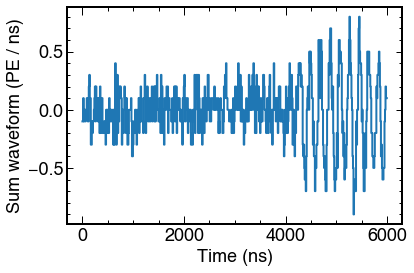

In [97]:
def plot_peak(p, t0=None, **kwargs):
    n = p['length']
    if t0 is None:
        t0 = p['time']
    plt.plot((p['time'] - t0) + np.arange(n) * p['dt'], 
             p['data'][:n] / p['dt'], 
             linestyle='steps-mid',
             **kwargs)
    plt.xlabel("Time (ns)")
    plt.ylabel("Sum waveform (PE / ns)")

plot_peak(df[26])

In [108]:
def gaus(x, a, mu, sig, const):
    return a*np.exp(-0.5*(x-mu)**2/sig**2)+const

In [184]:
info = {
    'mean': [],
    'sig': [],
    'pmt': []
}
n_chanel_s = np.arange(0, 254, 1)
# pmts_rejected = [1, 2, 26, 62, 65, 79, 88, 102, 118, 130, 134, 135, 137, 139, 
#  150, 152, 162, 178, 183, 198, 206, 213, 214, 234, 239, 244]
hit_pattern = []

for n_channel in tqdm(n_chanel_s):
#     if n_channel in pmts_rejected:
#         continue
    #n_channel = 0
    df_tmp = df[df['channel'] == n_channel]
    amp = []
    for df_ in df_tmp:
        amp.append(np.max(df_['data']))
    amp = np.array(amp)

    hist = Hist1d(amp, bins=np.linspace(0, 200, 100))

    # fit amp
    mask = (hist.bin_centers > 30) & (hist.bin_centers < 200)
    popt, pcov = curve_fit(gaus, hist.bin_centers[mask], hist.histogram[mask], 
                           p0=[10, 60, 20, 0], maxfev=int(1e6))
    # plot?
    #     hist.plot()
    #     x = np.linspace(30, 200, 100)
    #     plt.plot(x, gaus(x, *popt), 'r-', label='Mean: %.1f\nStd: %.1f' %(popt[1], popt[2]))
    #     plt.title('Channel %d' %n_channel)
    #     plt.yscale('log')
    #     plt.legend(loc='best')
    #     plt.show()

    mean, sig = popt[1], popt[2]
    info['mean'].append(popt[1])
    info['sig'].append(popt[2])
    info['pmt'].append(n_channel)

    mask = (amp < mean + sig) & (amp > mean - sig)
    hit_pattern.append(df_tmp[mask]['data'].sum(axis=0))
    
    #hit_pattern.append(df[mask])

 11%|█         | 28/254 [00:00<00:05, 43.15it/s]/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
100%|██████████| 254/254 [00:08<00:00, 28.99it/s]


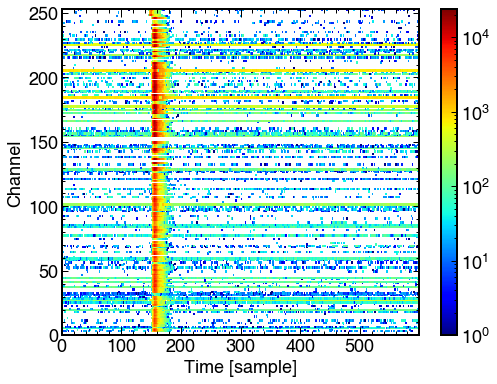

In [188]:
time = np.arange(0, 600, 1)
channel = np.arange(0, 254, 1)
time_grid, channel_grid = np.meshgrid(time, channel)
plt.pcolormesh(time_grid, channel_grid, hit_pattern, norm=LogNorm())
plt.xlabel('Time [sample]')
plt.ylabel('Channel')
plt.colorbar()
plt.show()

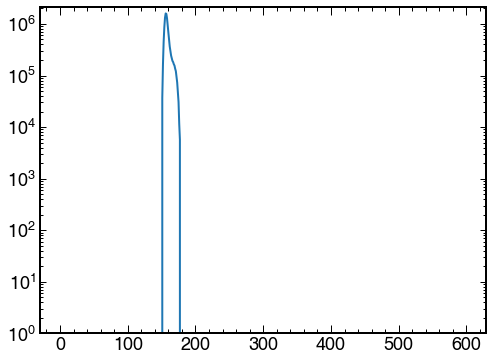

In [196]:
plt.plot(time, np.array(hit_pattern).sum(axis=0))
plt.yscale('log')
plt.ylim(1,)
plt.show()

In [197]:
np.array(hit_pattern).sum(axis=0)

array([ -32960,  -29144,  -33386,  -28754,  -33747,  -29422,  -33681,
        -30023,  -34158,  -29373,  -33664,  -29478,  -33113,  -28922,
        -33049,  -29203,  -33060,  -28783,  -33240,  -28291,  -32669,
        -28432,  -32998,  -28802,  -33313,  -29403,  -34273,  -29779,
        -34613,  -29898,  -35095,  -30401,  -34481,  -28987,  -33823,
        -29620,  -33306,  -28320,  -33433,  -28660,  -33180,  -28674,
        -32872,  -29145,  -34735,  -29651,  -34287,  -30466,  -34297,
        -30063,  -34163,  -29296,  -34237,  -29518,  -33805,  -28996,
        -33687,  -28707,  -32586,  -28602,  -33519,  -29427,  -33080,
        -29246,  -34048,  -29714,  -34510,  -30133,  -33752,  -29489,
        -33914,  -29205,  -33399,  -28815,  -33735,  -29361,  -33096,
        -28543,  -33465,  -28951,  -33555,  -29040,  -33637,  -30367,
        -35099,  -30180,  -34865,  -30056,  -34199,  -30186,  -33967,
        -29242,  -33018,  -28818,  -33503,  -28537,  -32974,  -28507,
        -33874,  -29

In [190]:
np.array(hit_pattern).shape

(254, 600)

In [193]:
.shape

(600,)